# Supply Chain Data Analysis 

### Importing Necessary Libraries:

In [1]:
# Data manipulation and Handling Libraries
import pandas as pd
import numpy as np

# Visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import plotly.express as px

# Data preprocessing and EDA libararies:
from collections import OrderedDict
import math

#Waring filer library
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Loading in the data:

In [3]:
data = pd.read_excel('Supplychain train dataset.xlsx')
data.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

### Inspecting Data:

In [5]:
data.isnull().sum()/len(data) * 100

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

**Following columns have null values:**

* wh_est_year
* approved_wh_govt_certificate
* workers_num

In [6]:
data.duplicated(keep = False).sum()

0

**There are no duplicate values in the data frame.**

In [7]:
data.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        22150.000000         22150.000000       22150.000000   
mean             4.097020             0.777201           3.103928   
std              2.606289             1.201747           1.142886   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     22150.000000     22150.000000    22150.000000  22150.000000   
mean       4983.115711        42.386998        0.098691      0.054492   
std        1050.634225        16.057730        0.298253      0.226991   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.250000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5499.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     22150.000000   22150.000000  21273.000000  11605.000000   
mean          0.656072     163.613725     28.936398   2009.401206   
std           0.475028      62.660709      7.843431      7.527223   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                22150.000000   22150.000000      22150.000000   
mean                    17.116659       0.304199          3.487765   
std                      9.174193       0.460078          1.691661   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    22150.000000    22150.000000  
mean        18.767765    22086.780813  
std          8.644778    11626.192340  
min          1.000000     2065.000000  
25%         11.000000    12151.000000  
50%         20.000000    22099.000000  
75%         26.000000    30102.000000  
max         32.000000    55151.000000

**Lets build a custom function to describe the data in details.**

In [8]:
def custom_summary(my_df):
    results = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'Feature Name': col,
                'Count': my_df[col].count(),
                'Minimum': my_df[col].min(),
                'Quartile 1': my_df[col].quantile(0.25),
                'Quartile 2': my_df[col].quantile(0.50),
                'Quartile 3': my_df[col].quantile(0.75),
                'Mean': my_df[col].mean(),
                'Maximum': my_df[col].max(),
                'Variance': round(my_df[col].var()),
                'Standard Deviation': my_df[col].std(),
                'Skewness': my_df[col].skew(),
                'Kurtosis': my_df[col].kurt()
            })
            results.append(stats)
        
    result_df = pd.DataFrame(results)
    # Skewness  type:
    skewness_label = []
    for i in result_df['Skewness']:
          if i <= -1:
              skewness_label.append('Highly negatively skewed')                   
          elif -1 < i <= -0.5:
              skewness_label.append('Moderately negatively skewed')    
          elif -0.5 < i < 0:
              skewness_label.append('Fairly negatively skewed')                        
          elif 0 <= i <= 0.5:
              skewness_label.append('Fairly postively skewed')                        
          elif 0.5 <= i <= 1:
              skewness_label.append('Moderately postively skewed')                       
          else:
              skewness_label.append('Highly postively skewed')                    
    result_df['Skewness Comment']= skewness_label
    
    # Kurtosis type:
    kurtosis_label=[]
    for i in result_df['Kurtosis']:
           if i >=1:
               kurtosis_label.append('Leptokurtic curve')                  
           elif i<=-1:
               kurtosis_label.append('Platykurtic curve')                   
           else:
               kurtosis_label.append('Mesokurtic curve')  
    result_df['Kurtosis Comment']= kurtosis_label
    
    #Outlier type()
    Outlier_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3-Q1
            LW = Q1-IQR*1.5
            UW = Q3+IQR*1.5
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                Outlier_label.append('Have Outliers')
            else:
                Outlier_label.append('Have No Outliers')
    result_df['Outlier Comment'] = Outlier_label
    
    return result_df

In [9]:
custom_summary(data)

Feature Name  Count  Minimum  Quartile 1  Quartile 2  \
0           num_refill_req_l3m  22150      0.0        2.00         4.0   
1          transport_issue_l1y  22150      0.0        0.00         0.0   
2            Competitor_in_mkt  22150      0.0        2.00         3.0   
3              retail_shop_num  22150   1821.0     4309.25      4859.0   
4              distributor_num  22150     15.0       29.00        42.0   
5               flood_impacted  22150      0.0        0.00         0.0   
6                  flood_proof  22150      0.0        0.00         0.0   
7              electric_supply  22150      0.0        0.00         1.0   
8                dist_from_hub  22150     55.0      109.00       164.0   
9                  workers_num  21273     10.0       24.00        28.0   
10                 wh_est_year  11605   1996.0     2003.00      2009.0   
11  storage_issue_reported_l3m  22150      0.0       10.00        18.0   
12               temp_reg_mach  22150      0.0        0.00         0.0   
13            wh_breakdown_l3m  22150      0.0        2.00         3.0   
14              govt_check_l3m  22150      1.0       11.00        20.0   
15              product_wg_ton  22150   2065.0    12151.00     22099.0   

    Quartile 3          Mean  Maximum   Variance  Standard Deviation  \
0          6.0      4.097020      8.0          7            2.606289   
1          1.0      0.777201      5.0          1            1.201747   
2          4.0      3.103928     12.0          1            1.142886   
3       5499.0   4983.115711  11008.0    1103832         1050.634225   
4         56.0     42.386998     70.0        258           16.057730   
5          0.0      0.098691      1.0          0            0.298253   
6          0.0      0.054492      1.0          0            0.226991   
7          1.0      0.656072      1.0          0            0.475028   
8        218.0    163.613725    271.0       3926           62.660709   
9         33.0     28.936398     98.0         62            7.843431   
10      2016.0   2009.401206   2023.0         57            7.527223   
11        24.0     17.116659     39.0         84            9.174193   
12         1.0      0.304199      1.0          0            0.460078   
13         5.0      3.487765      6.0          3            1.691661   
14        26.0     18.767765     32.0         75            8.644778   
15     30102.0  22086.780813  55151.0  135168348        11626.192340   

    Skewness   Kurtosis              Skewness Comment   Kurtosis Comment  \
0  -0.081390  -1.218193      Fairly negatively skewed  Platykurtic curve   
1   1.605424   1.820683       Highly postively skewed  Leptokurtic curve   
2   0.985102   1.798511   Moderately postively skewed  Leptokurtic curve   
3   0.905324   1.846915   Moderately postively skewed  Leptokurtic curve   
4   0.017210  -1.187118       Fairly postively skewed  Platykurtic curve   
5   2.691308   5.243614       Highly postively skewed  Leptokurtic curve   
6   3.925685  13.412215       Highly postively skewed  Leptokurtic curve   
7  -0.657167  -1.568273  Moderately negatively skewed  Platykurtic curve   
8  -0.009042  -1.200679      Fairly negatively skewed  Platykurtic curve   
9   1.042478   3.285720       Highly postively skewed  Leptokurtic curve   
10  0.007485  -1.181144       Fairly postively skewed  Platykurtic curve   
11  0.117473  -0.678794       Fairly postively skewed   Mesokurtic curve   
12  0.851244  -1.275500   Moderately postively skewed  Platykurtic curve   
13 -0.072809  -0.953437      Fairly negatively skewed   Mesokurtic curve   
14 -0.357737  -1.061053      Fairly negatively skewed  Platykurtic curve   
15  0.336012  -0.497377       Fairly postively skewed   Mesokurtic curve   

     Outlier Comment  
0   Have No Outliers  
1      Have Outliers  
2      Have Outliers  
3      Have Outliers  
4   Have No Outliers  
5      Have Outliers  
6      Have Outliers  
7   Have No Outliers  
8   Have No Outliers  
9      Have

**From the above description table we can see that these columns have outliers:**
    
   * workers_num
   * transport_issue_l1y
   * Competitor_in_mkt
   * retail_shop_num
   
These can be further analyzed and outlier treatment can be performed.

In [10]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

**Ouliers Detection Plots:**

In [11]:
def odt_plots(my_df, col):
    f,(ax1,ax2) = plt.subplots(1,2, figsize=(25,8))
    
    #Descriptive Statistics BOX plot
    
    sns.boxplot(my_df[col], ax=ax1)
    ax1.set_title(col + 'Box plot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Boxplot')
    
    #Plotting Histogram with outliers
    
    sns.distplot(my_df[col], ax=ax2, fit= sci.norm)  #On histogram we are fitting normal distribution curve
    ax2.set_title(col + ' Histogram with outliers')
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(), color = 'brown')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Histogram with outliers')
    plt.show()

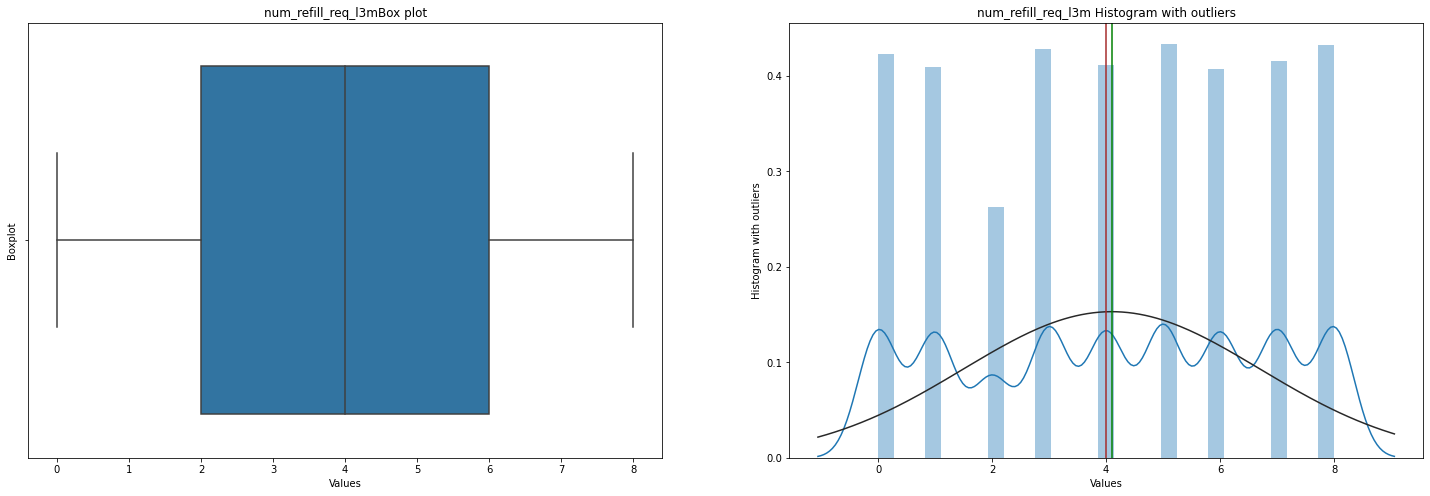

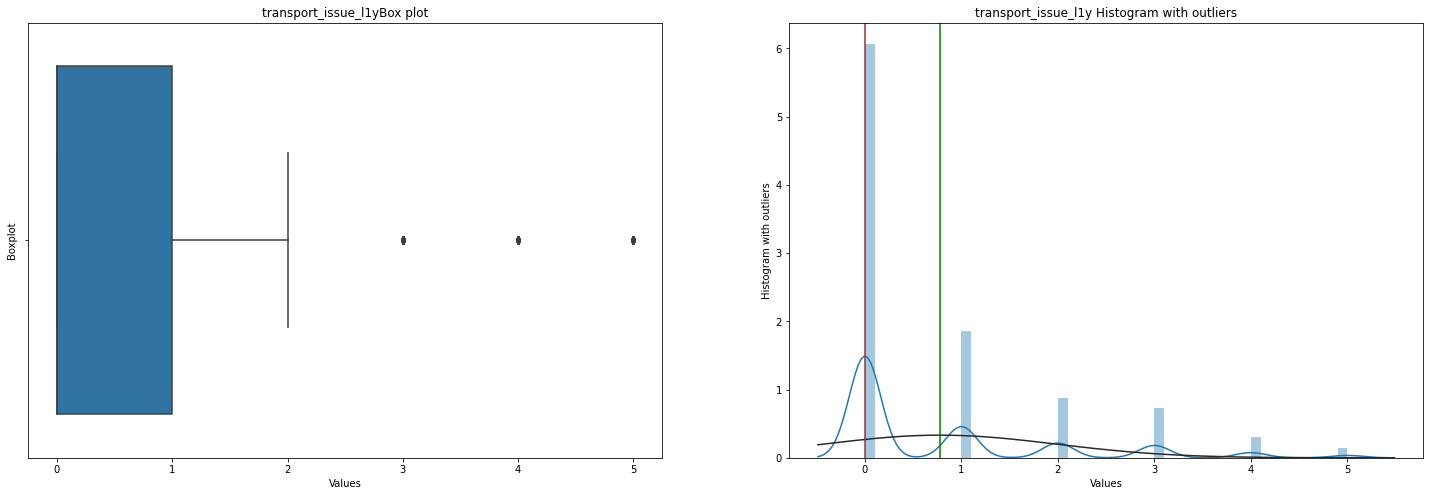

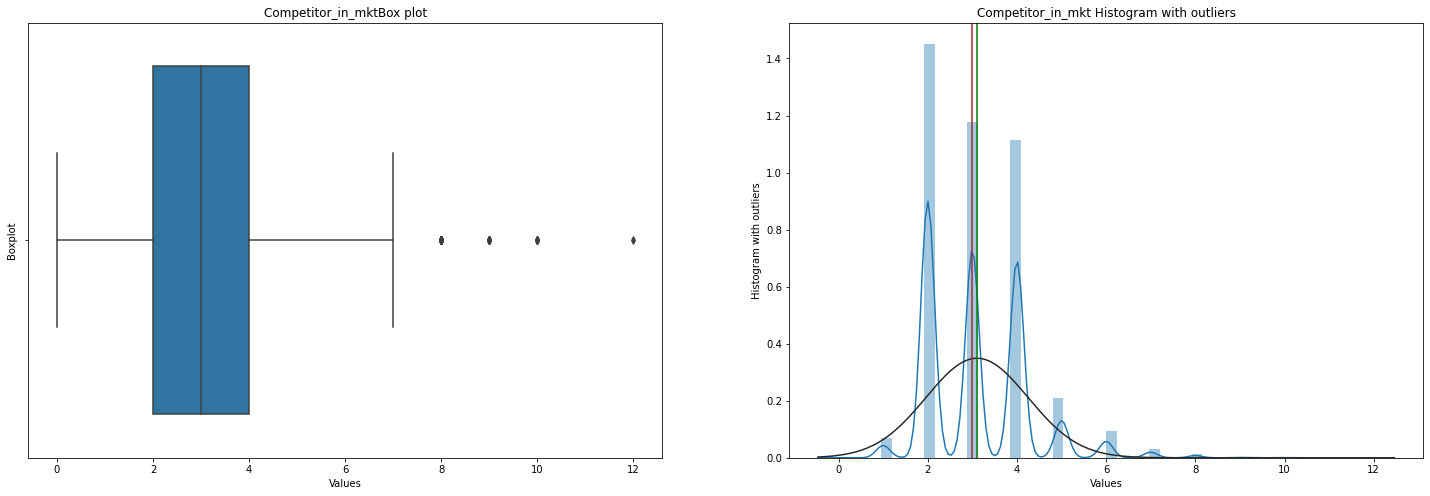

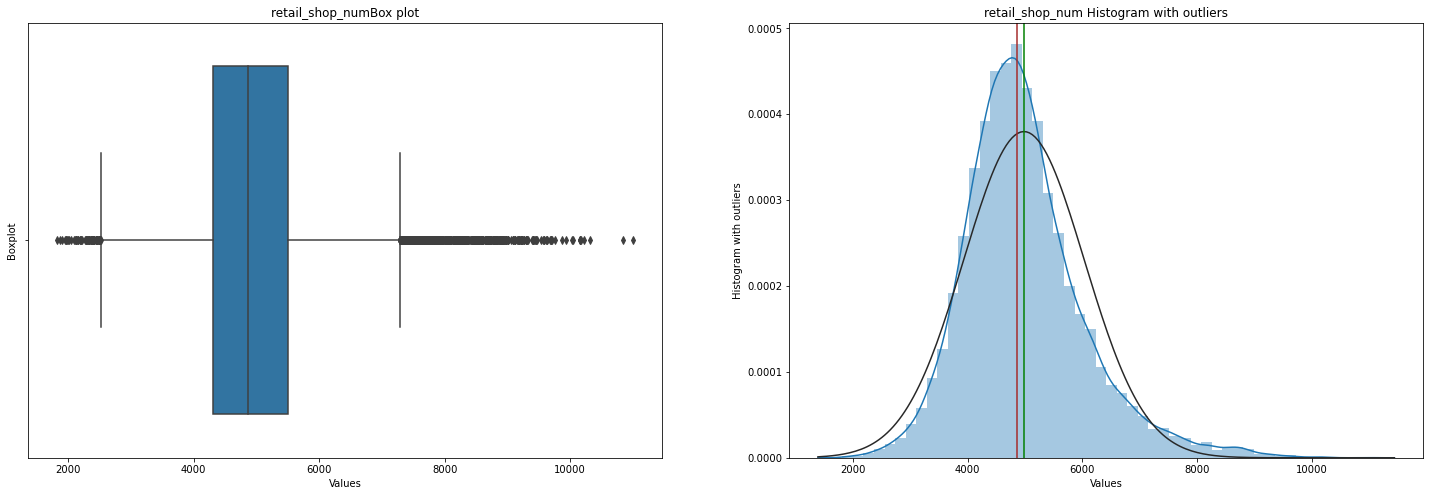

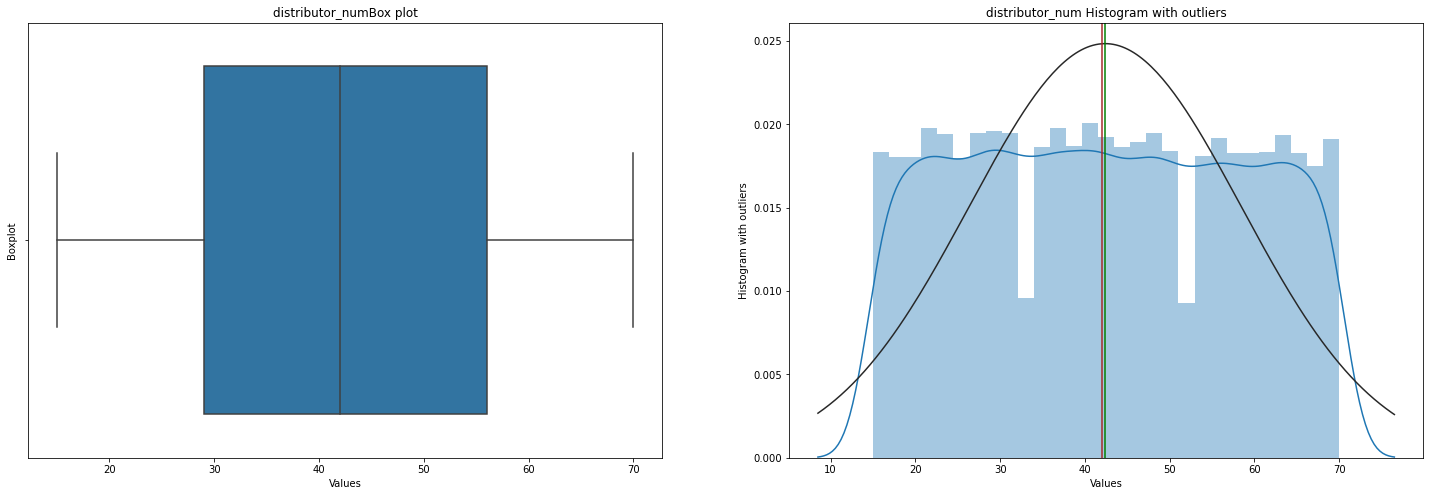

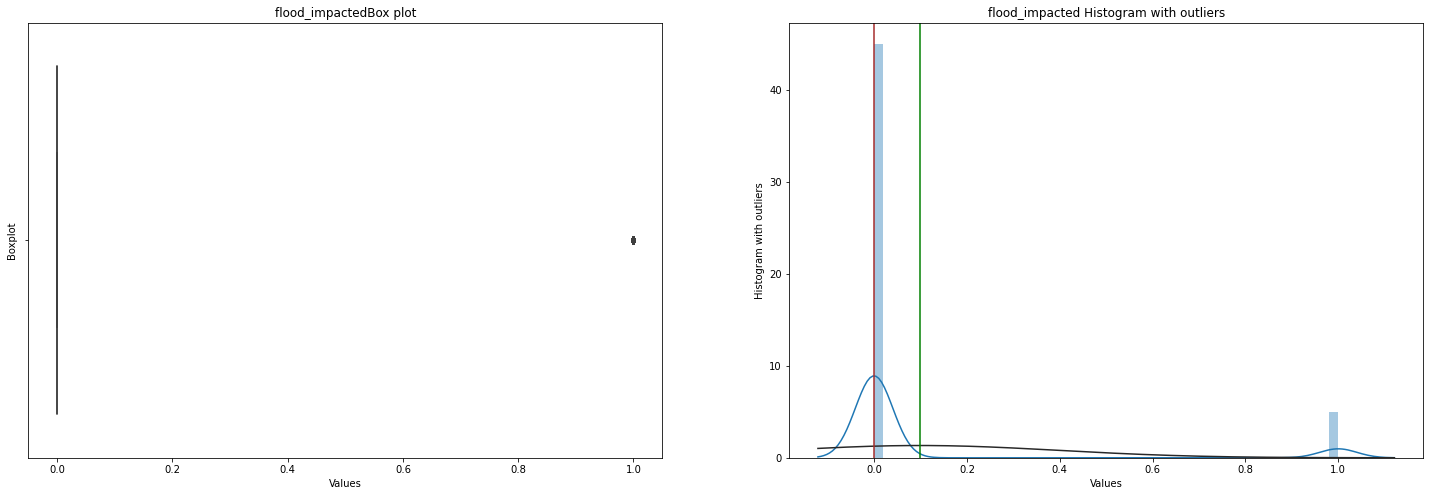

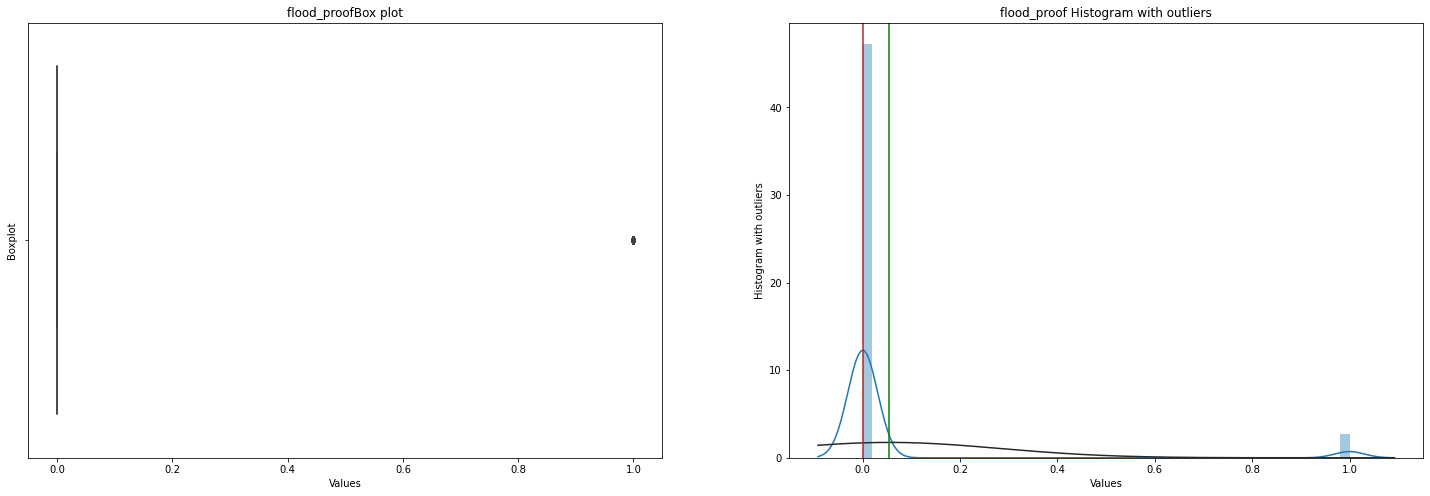

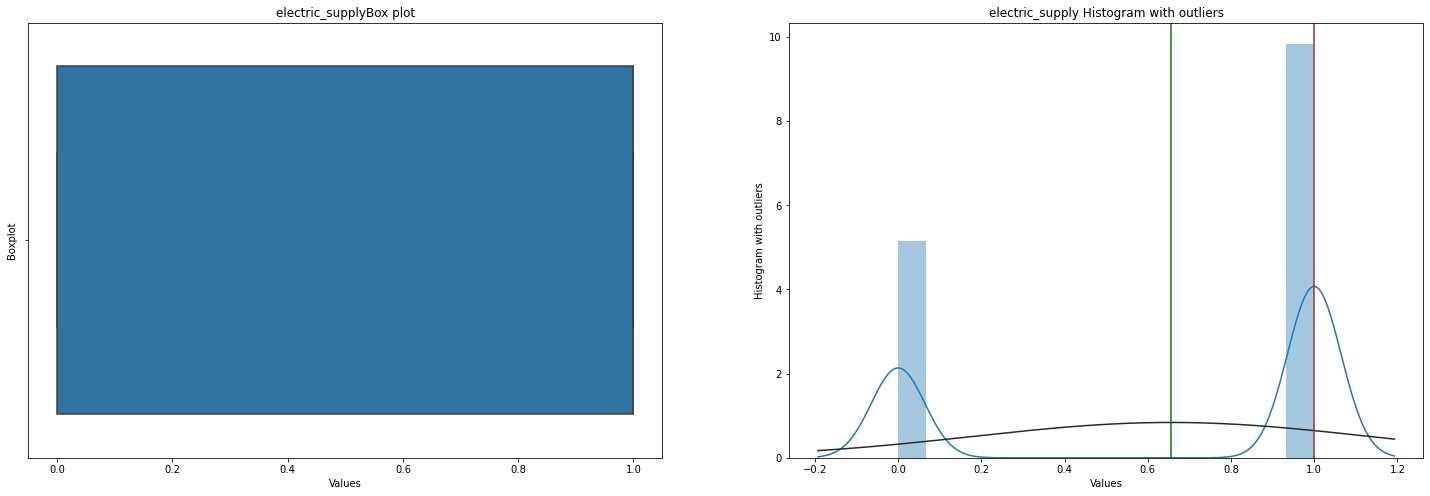

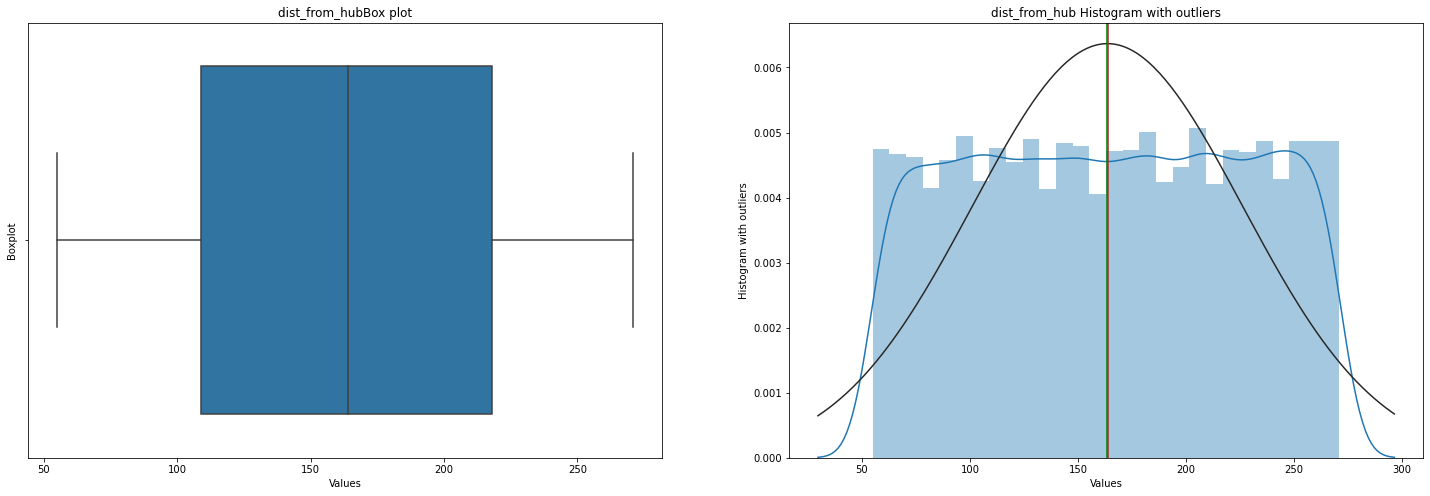

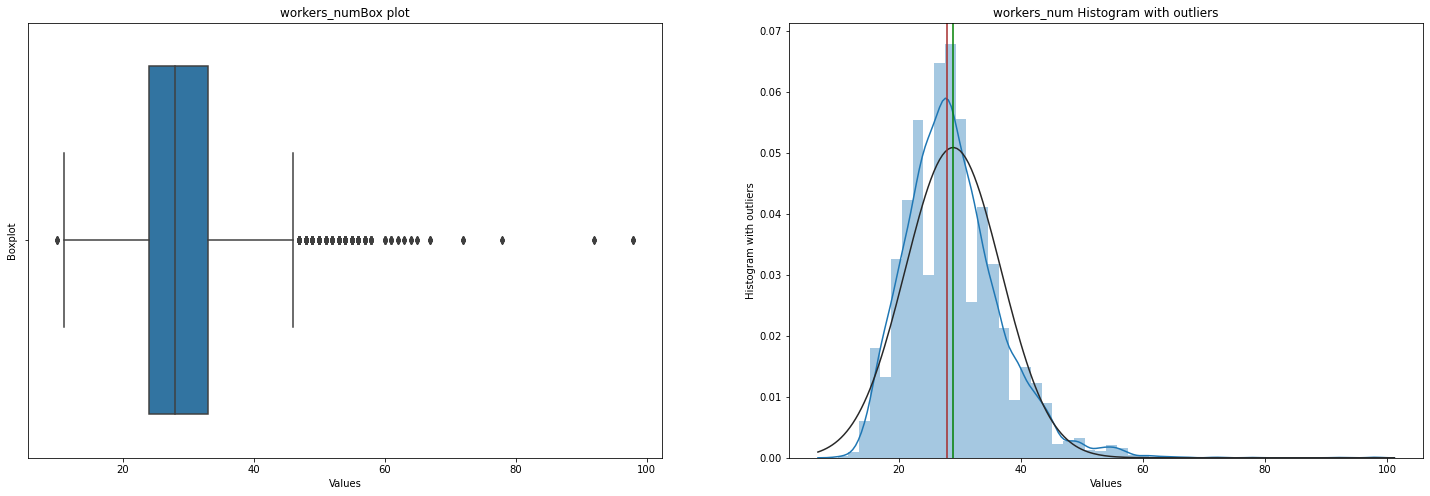

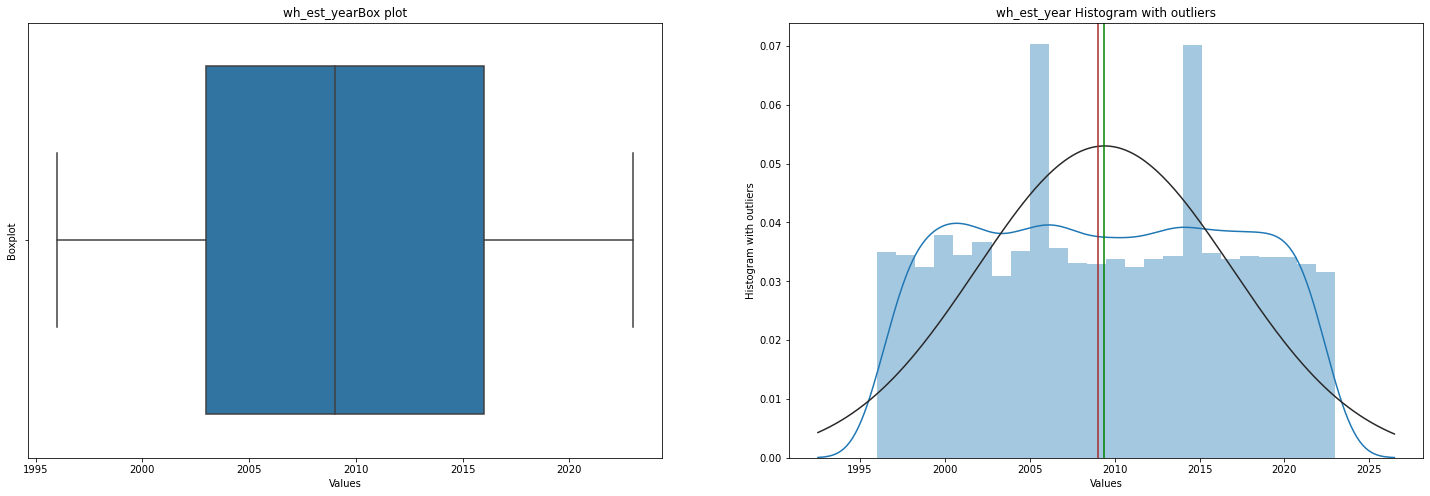

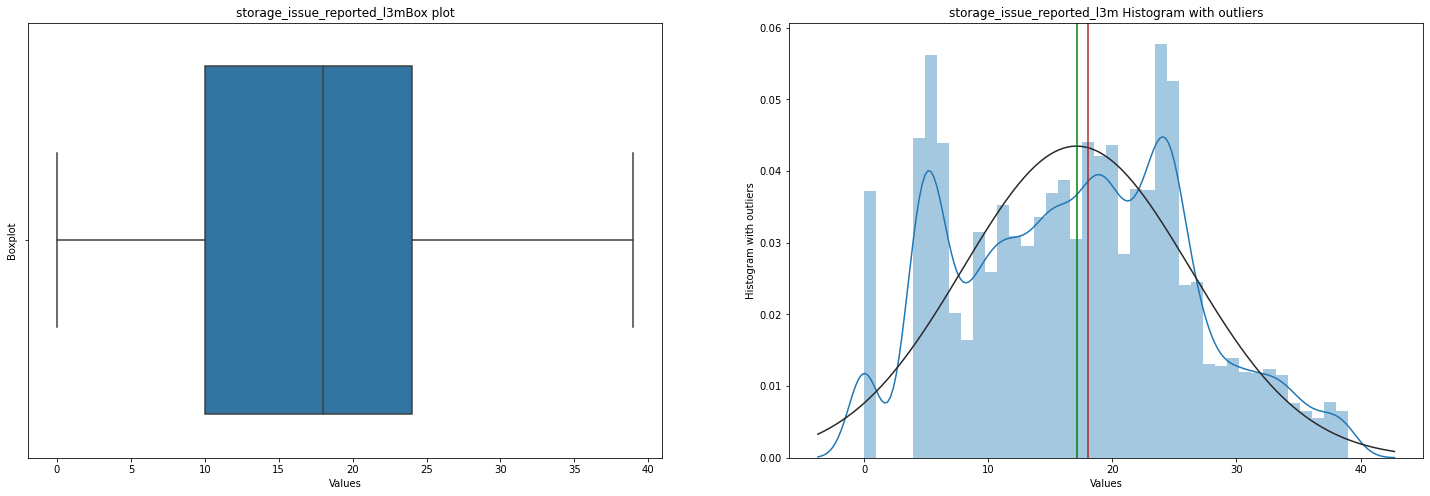

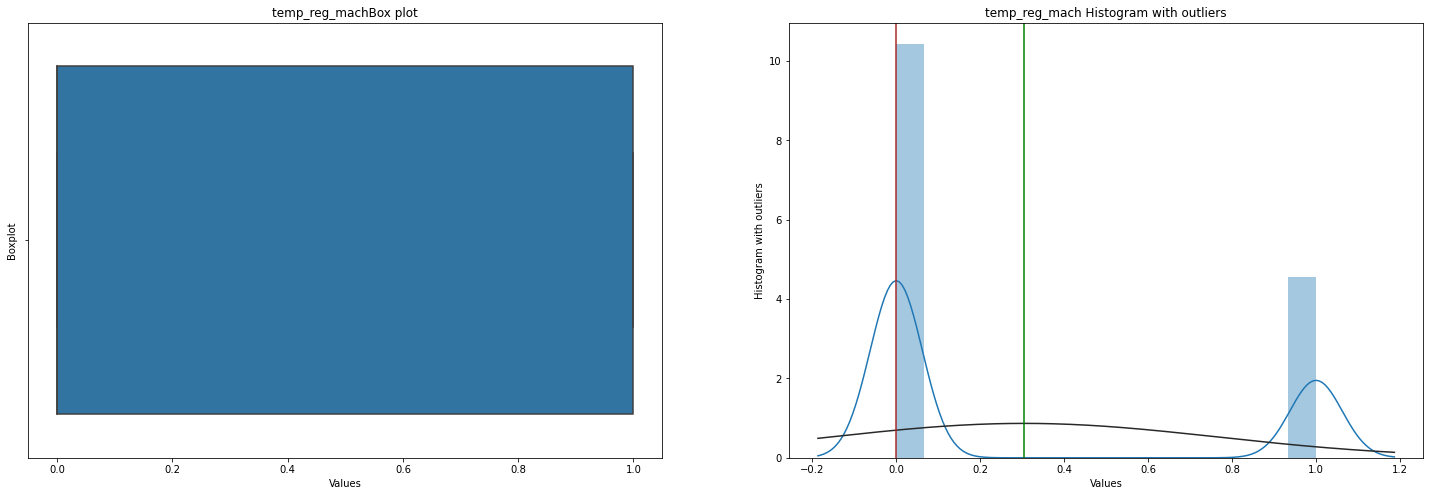

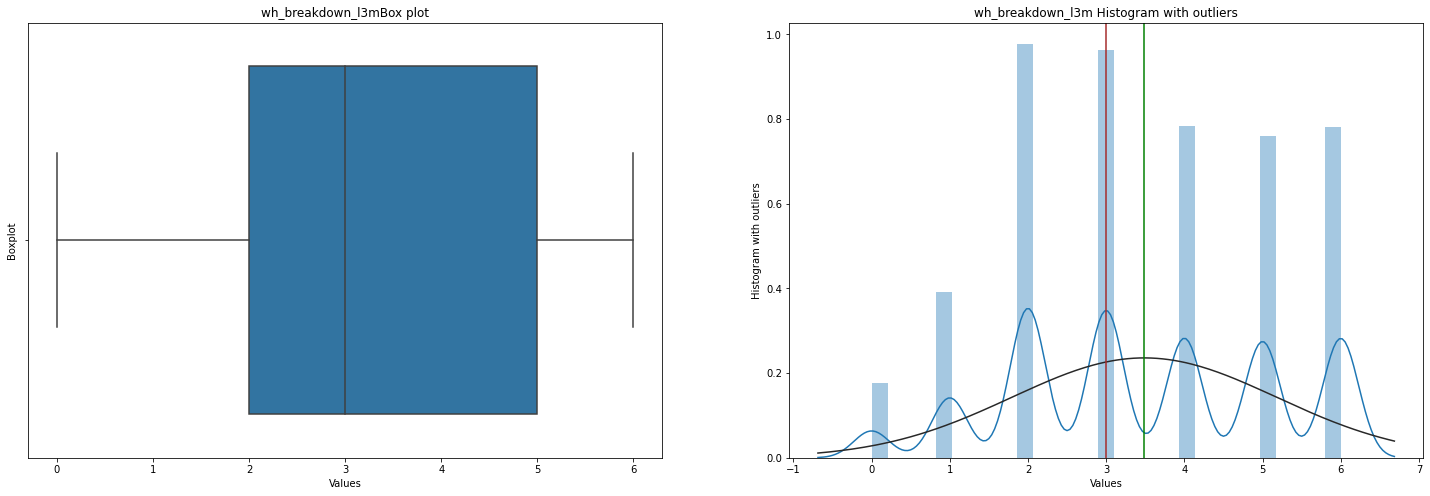

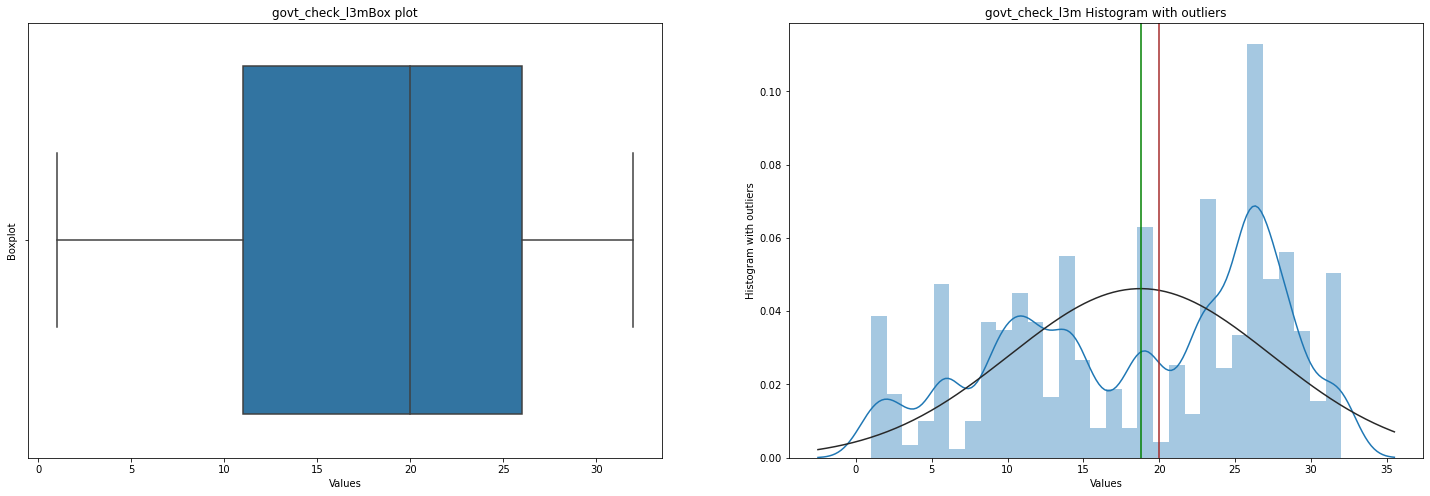

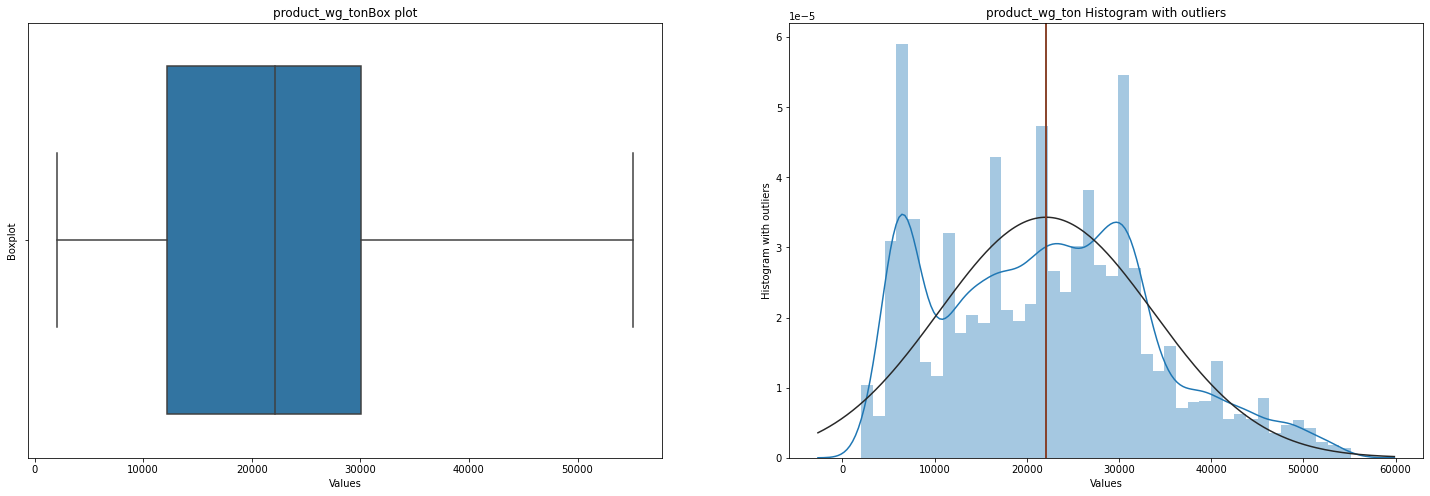

In [12]:
for col in data.columns:
    if data[col].dtypes!='object':
        odt_plots(data,col)

### Multivariate Analysis using Regression

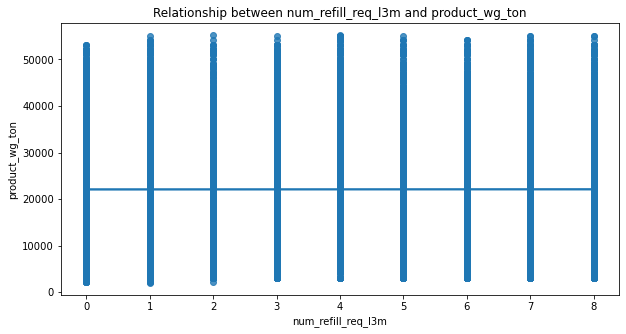

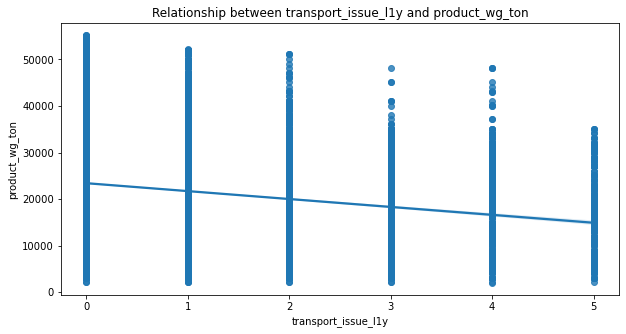

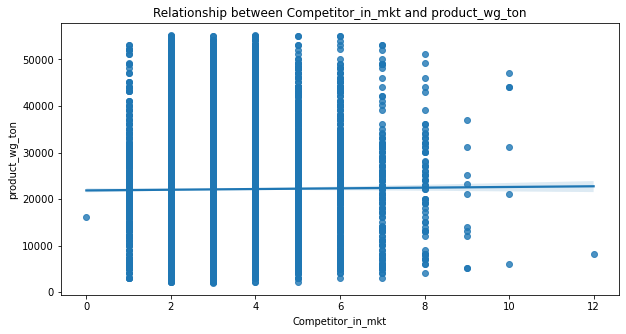

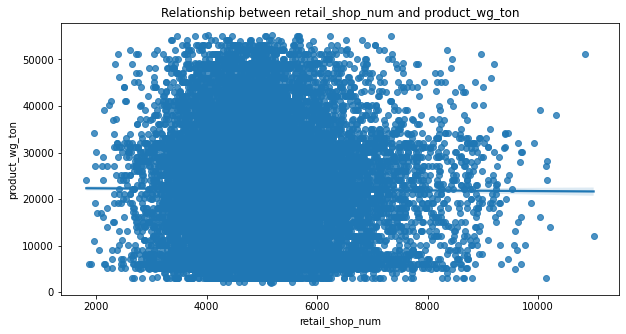

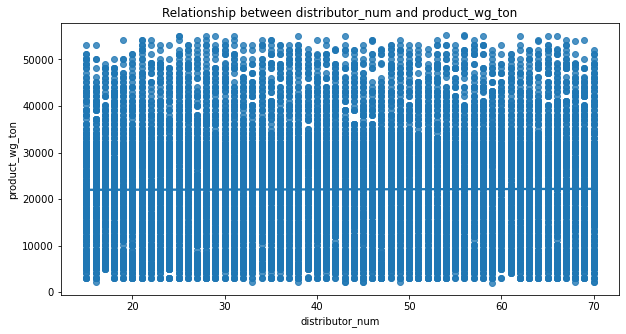

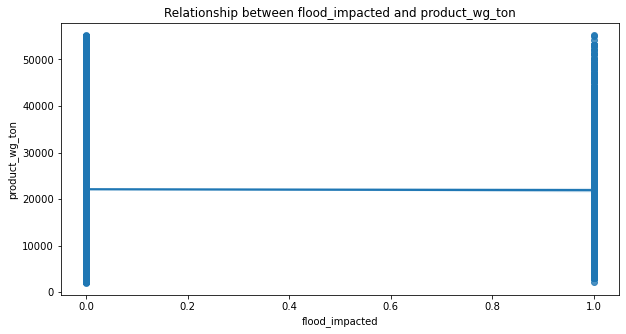

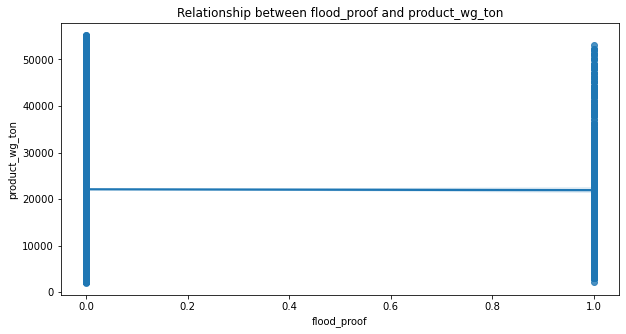

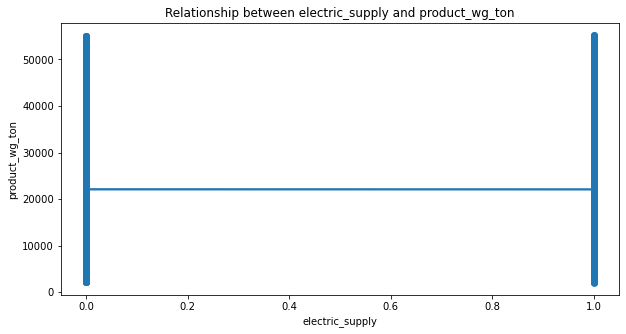

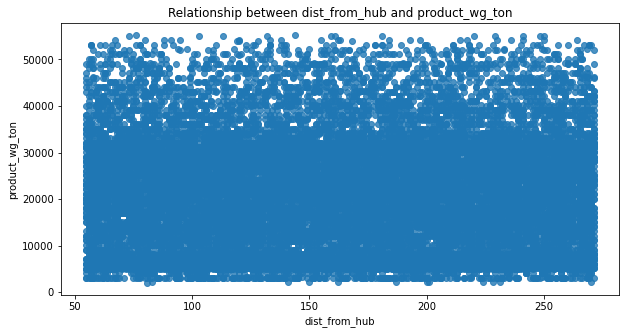

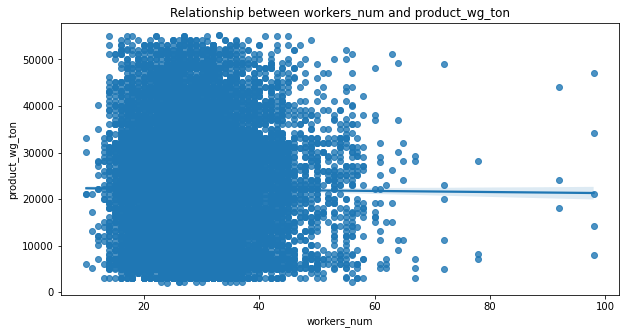

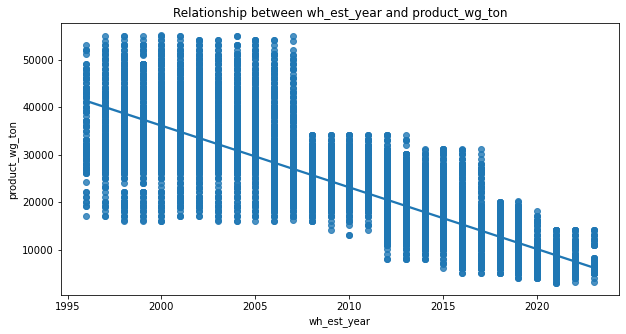

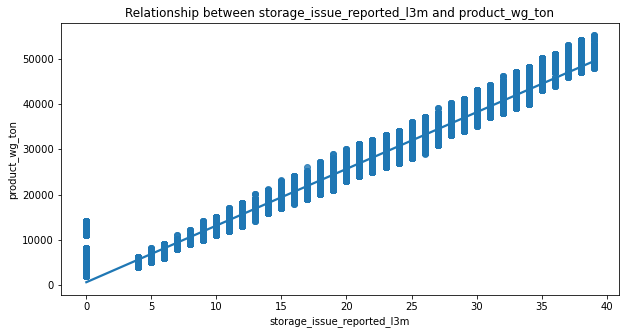

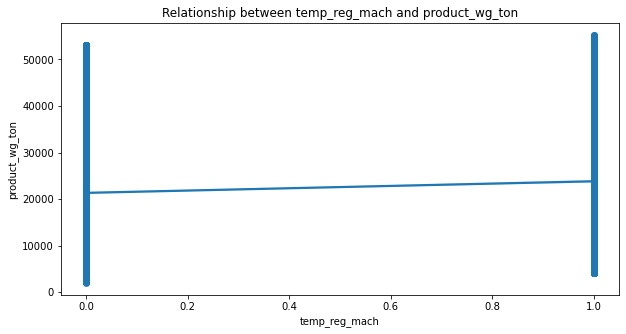

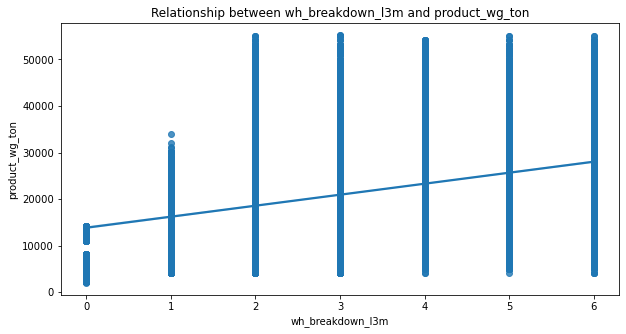

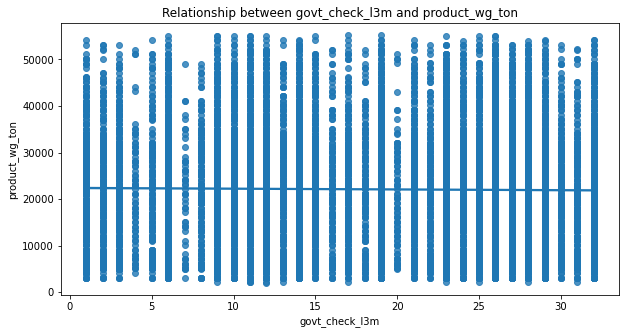

In [13]:
for col in data.columns:
    if col !='product_wg_ton' and data[col].dtypes!='object':
        fig , ax1 = plt.subplots(figsize =(10,5))
        sns.regplot(x=data[col], y=data['product_wg_ton'], ax=ax1).set_title(f'Relationship between {col} and product_wg_ton')

**Checking Correlation between different variabels**

<AxesSubplot:>

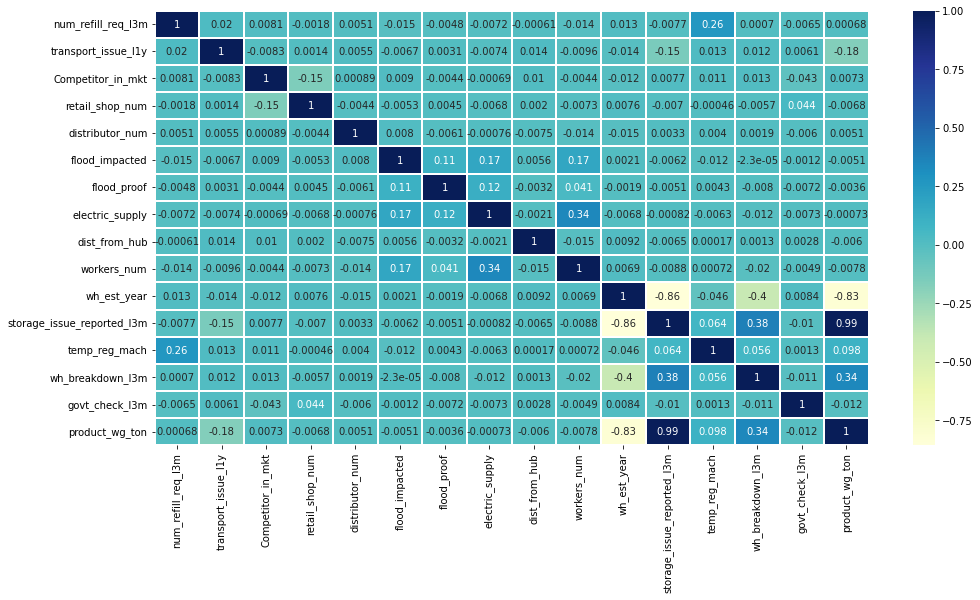

In [14]:
plt.figure(figsize=(16,8))

corr_mat = data.corr()
mask = np.triu(np.ones_like(corr_mat, dtype= bool))
sns.heatmap(corr_mat,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

In [15]:
corr_mat['product_wg_ton'].sort_values(ascending = False)[1:]

storage_issue_reported_l3m    0.986796
wh_breakdown_l3m              0.343677
temp_reg_mach                 0.098452
Competitor_in_mkt             0.007282
distributor_num               0.005143
num_refill_req_l3m            0.000676
electric_supply              -0.000725
flood_proof                  -0.003567
flood_impacted               -0.005055
dist_from_hub                -0.006040
retail_shop_num              -0.006785
workers_num                  -0.007800
govt_check_l3m               -0.011977
transport_issue_l1y          -0.175746
wh_est_year                  -0.828743
Name: product_wg_ton, dtype: float64

**num_refill_req_l3m**

<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='product_wg_ton'>

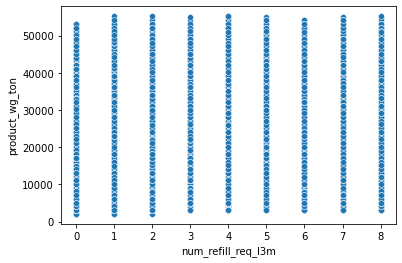

In [16]:
sns.scatterplot(data = data, x= 'num_refill_req_l3m', y = 'product_wg_ton')

In [17]:
from scipy.stats import pearsonr

In [18]:
pearsonr(data['product_wg_ton'], data['num_refill_req_l3m'])

(0.00067577380581208, 0.9198926749298368)

**transport_issue_l1y**

<AxesSubplot:xlabel='transport_issue_l1y', ylabel='product_wg_ton'>

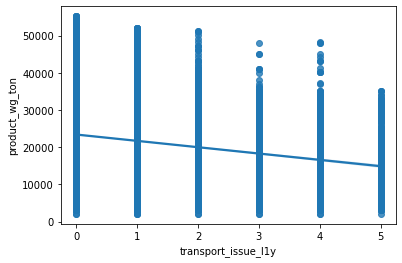

In [19]:
sns.regplot(data = data, x= 'transport_issue_l1y', y = 'product_wg_ton')

In [20]:
pearsonr(data['product_wg_ton'], data['retail_shop_num'])

(-0.0067852984351003095, 0.3125900710561325)

**Competitor_in_mkt**

<AxesSubplot:xlabel='retail_shop_num', ylabel='product_wg_ton'>

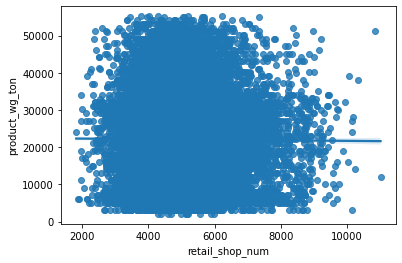

In [21]:
sns.regplot(data = data, x= 'retail_shop_num', y = 'product_wg_ton')

**distributor_num:**

In [22]:
pearsonr(data['product_wg_ton'], data['distributor_num'])

(0.0051428951816741885, 0.4440497152204103)

In [23]:
px.scatter(data, x= 'distributor_num', y = 'product_wg_ton')

**dist_from_hub:**

In [24]:
pearsonr(data['product_wg_ton'], data['dist_from_hub'])

(-0.0060400108721754215, 0.368714025054693)

<AxesSubplot:xlabel='dist_from_hub', ylabel='product_wg_ton'>

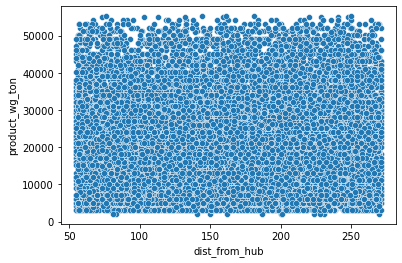

In [25]:
sns.scatterplot(data= data, x= 'dist_from_hub', y = 'product_wg_ton')

**storage_issue_reported_l3m**

In [26]:
pearsonr(data['product_wg_ton'], data['storage_issue_reported_l3m'])

(0.9867962159396104, 0.0)

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

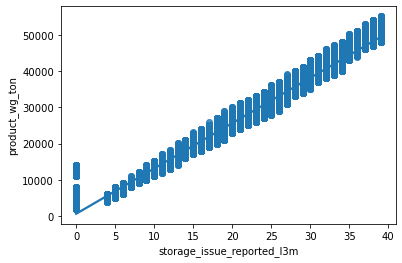

In [27]:
sns.regplot(data = data , x ='storage_issue_reported_l3m', y = 'product_wg_ton')

**wh_breakdown_l3m**

In [28]:
pearsonr(data['product_wg_ton'], data['wh_breakdown_l3m'])

(0.3436766901033246, 0.0)

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

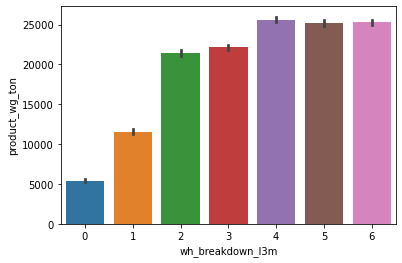

In [29]:
sns.barplot(data = data, x = 'wh_breakdown_l3m', y ='product_wg_ton')

**wh_est_year**

<AxesSubplot:xlabel='wh_est_year', ylabel='product_wg_ton'>

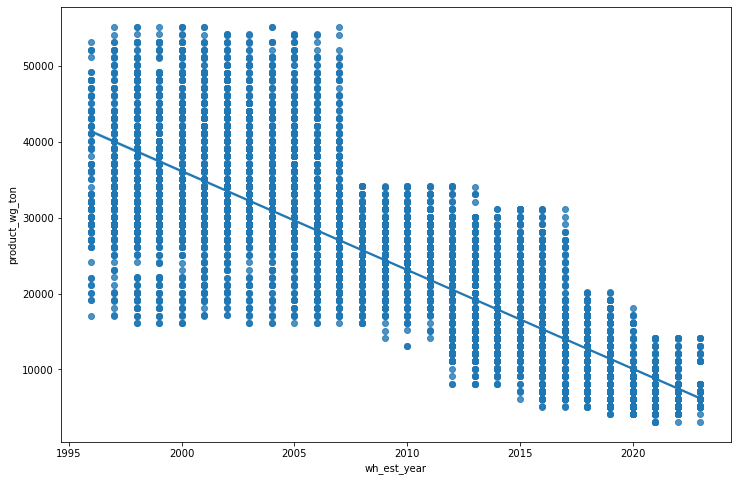

In [30]:
plt.figure(figsize=(12,8))
sns.regplot(data = data, x = 'wh_est_year', y = 'product_wg_ton')

**Location_type:**

In [31]:
data['Location_type'].value_counts()

Rural    20334
Urban     1816
Name: Location_type, dtype: int64

In [32]:
urban = data[data['Location_type']=='Urban']['product_wg_ton'].mean()

In [33]:
rural = data[data['Location_type']=='Rural']['product_wg_ton'].mean()

Text(0.5, 1.0, 'Bar Plot')

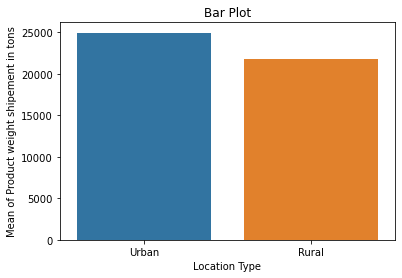

In [34]:
sns.barplot(x =['Urban','Rural'], y = [urban,rural])
plt.xlabel('Location Type')
plt.ylabel('Mean of Product weight shipement in tons')
plt.title('Bar Plot')

Even though there are lot of warehouse in the Rural location compared to Urban, the mean shipment weight is higher for urban locations.

**storage_issue_reported_l3m :**

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

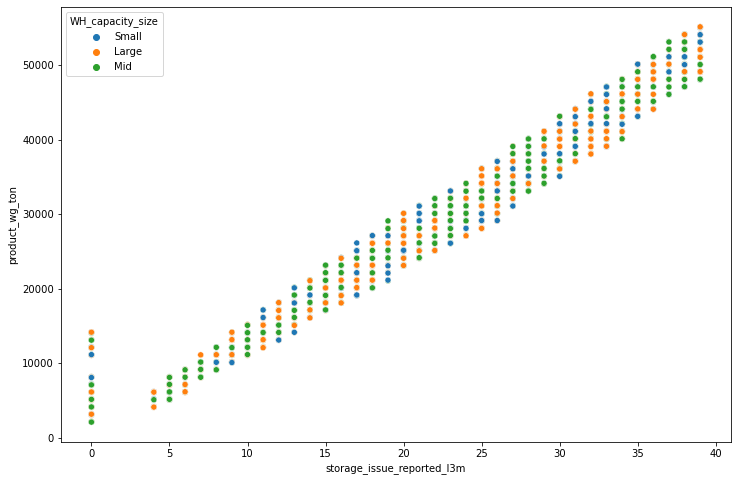

In [35]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = data, x = 'storage_issue_reported_l3m',y = 'product_wg_ton', hue='WH_capacity_size')

In [36]:
px.scatter(data, x = 'storage_issue_reported_l3m',y = 'product_wg_ton', color='wh_est_year')

**Running PointBiserial Test on Categorical Variables**

In [38]:
CATEGORICAL_VARIABLES = ["Location_type_Urban", 
                       "wh_owner_type_Rented", 
                       "flood_impacted", 
                       "flood_proof", 
                       "electric_supply", 
                       "temp_reg_mach", ]

feature_columns = []
corelation_strenght = []
p_value = []
for c in CATEGORICAL_VARIABLES:
    correlation = sci.pointbiserialr(data[c], data["product_wg_ton"])
    feature_columns.append(c)
    corelation_strenght.append(correlation[0])
    p_value.append(correlation[1])
    print("Correlation of %s to product_wg_ton is %s" %(c, correlation))

KeyError: 'Location_type_Urban'

In [ ]:
point_bi_serial_test = pd.DataFrame(list(zip(feature_columns,corelation_strenght,p_value)), columns=['feature','correlation_strenght','p_value'])
point_bi_serial_test

In [39]:
zonal_data = data.groupby(['zone','WH_capacity_size'])['product_wg_ton'].agg(['count','mean'])

In [40]:
zonal_data

count          mean
zone  WH_capacity_size                     
East  Large                62  23321.516129
      Mid                 225  23070.106667
      Small                95  21567.568421
North Large              4821  22261.294337
      Mid                2662  22194.721638
      Small              1586  22108.745271
South Large              1426  21979.552595
      Mid                2848  21871.059691
      Small              1370  21882.719708
West  Large              2659  21720.802933
      Mid                3167  22431.084938
      Small              1229  21694.257120

In [41]:
zonal_data_table = zonal_data.pivot_table(index='zone',columns='WH_capacity_size',values=['mean'])

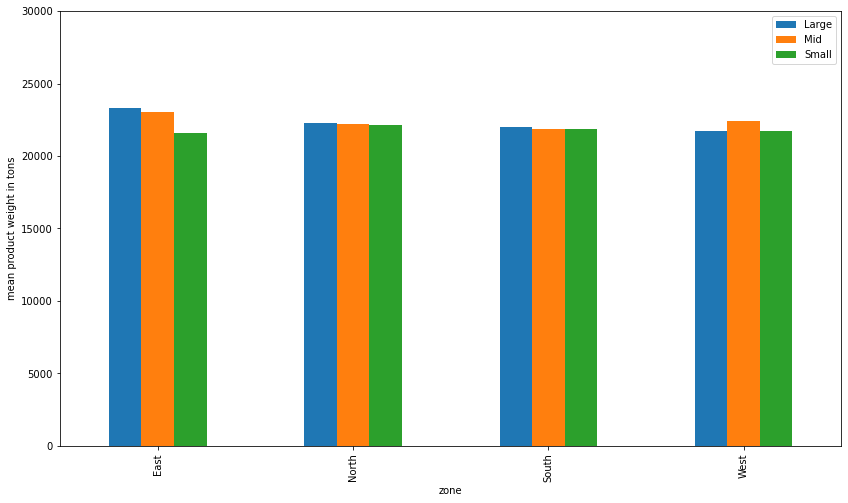

In [42]:
zonal_data_table.plot(kind='bar',figsize = (14,8))
plt.ylim([0,30000])
plt.ylabel('mean product weight in tons')
plt.legend(['Large','Mid','Small'])

In [43]:
zonal_data_table_count = zonal_data.pivot_table(index='zone',columns='WH_capacity_size',values=['count'])

In [44]:
zonal_data_table_count

count            
WH_capacity_size Large   Mid Small
zone                              
East                62   225    95
North             4821  2662  1586
South             1426  2848  1370
West              2659  3167  1229

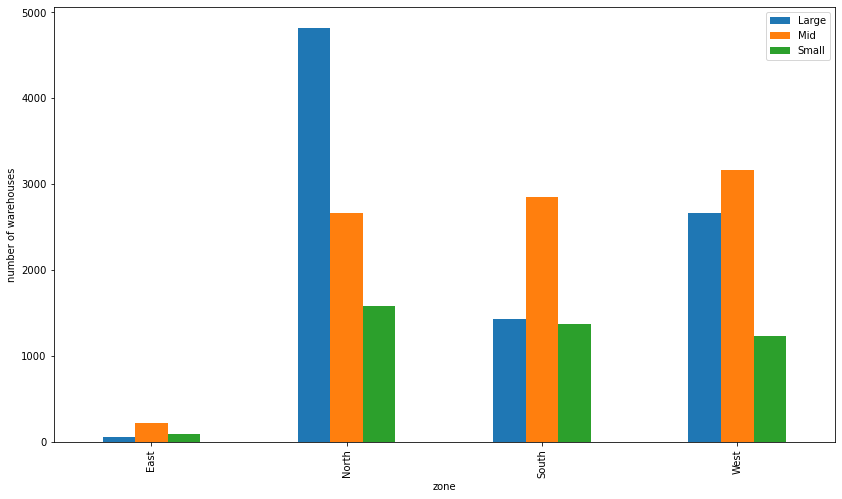

In [45]:
zonal_data_table_count.plot(kind='bar',figsize = (14,8))
plt.ylabel('number of warehouses')
plt.legend(['Large','Mid','Small'])